In [150]:
"""
Train  Lenet model

"""

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms


class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(16, 120,5)
        self.fc1 = nn.Linear(120, 84)
        self.fc2 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.relu(self.pool1(self.conv1(x)))
        x  = torch.relu(self.pool2(self.conv2(x)))
        x = torch.relu(self.conv3(x))
        x = x.view(-1, 120*1*1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


transform = transforms.Compose([
    transforms.Pad(2),
    transforms.ToTensor(),
])


train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
torch.tensor

model = LeNet()


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

num_epochs = 10
for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Epoch {epoch}, Batch {batch_idx}, Loss: {loss.item()}')
            
            
torch.save(model, 'lenet.pth')


Epoch 0, Batch 0, Loss: 2.300478458404541
Epoch 0, Batch 100, Loss: 2.2722320556640625
Epoch 0, Batch 200, Loss: 0.5773420333862305
Epoch 0, Batch 300, Loss: 0.3324986398220062
Epoch 0, Batch 400, Loss: 0.15482088923454285
Epoch 0, Batch 500, Loss: 0.21815066039562225
Epoch 0, Batch 600, Loss: 0.09181901812553406
Epoch 0, Batch 700, Loss: 0.20240846276283264
Epoch 0, Batch 800, Loss: 0.12485281378030777
Epoch 0, Batch 900, Loss: 0.05730437859892845
Epoch 1, Batch 0, Loss: 0.15836170315742493
Epoch 1, Batch 100, Loss: 0.08720941096544266
Epoch 1, Batch 200, Loss: 0.1351475715637207
Epoch 1, Batch 300, Loss: 0.08705014735460281
Epoch 1, Batch 400, Loss: 0.12532979249954224
Epoch 1, Batch 500, Loss: 0.06406571716070175
Epoch 1, Batch 600, Loss: 0.11764579266309738
Epoch 1, Batch 700, Loss: 0.07141970098018646
Epoch 1, Batch 800, Loss: 0.02215190790593624
Epoch 1, Batch 900, Loss: 0.1036379262804985
Epoch 2, Batch 0, Loss: 0.23258329927921295
Epoch 2, Batch 100, Loss: 0.164631187915802
Epo

Layer: conv3.weight, Shape: Parameter containing:
tensor([[[[ 2.10e-03, -2.31e-02,  9.77e-03,  3.17e-02, -9.69e-02],
          [-4.81e-03, -1.31e-02, -5.74e-02,  4.59e-03, -6.53e-02],
          [-1.94e-02, -4.89e-02, -2.09e-02, -4.28e-02, -3.35e-02],
          [ 3.22e-02,  3.66e-02, -7.48e-02, -5.79e-02, -3.62e-02],
          [ 4.40e-02,  9.55e-03,  7.41e-02,  5.15e-02, -2.84e-02]],

         [[-4.12e-02, -1.93e-03, -6.53e-03,  2.03e-02,  1.07e-01],
          [-3.37e-02, -5.74e-03, -9.25e-02, -7.33e-02,  7.19e-02],
          [-7.43e-02, -1.85e-02, -6.90e-02, -8.78e-02, -2.59e-03],
          [-1.97e-02, -1.20e-02, -5.00e-02, -7.62e-02, -1.88e-02],
          [-1.26e-02,  3.01e-02,  5.52e-02,  1.74e-02, -4.69e-02]],

         [[ 1.02e-02,  1.26e-02,  3.18e-02, -3.86e-02, -5.36e-02],
          [ 4.03e-02, -6.57e-02,  5.14e-02, -6.35e-02, -1.92e-02],
          [ 1.72e-02,  1.67e-02, -1.11e-02,  2.12e-02, -5.33e-03],
          [-1.79e-02, -5.74e-02,  3.18e-02, -7.37e-04, -3.78e-02],
        

In [2]:
"""

Verifiy the Lenet model by the Original test dataset and the test dataset with binarization process


"""

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import time


def binary_transform(image):
    return (image > 0).float()

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(16, 120,5)
        self.fc1 = nn.Linear(120, 84)
        self.fc2 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.relu(self.pool1(self.conv1(x)))
        x  = torch.relu(self.pool2(self.conv2(x)))
        x = torch.relu(self.conv3(x))
        x = x.view(-1, 120*1*1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

loaded_model = torch.load('lenet.pth')
test_transform = transforms.Compose([
    transforms.Pad(2),
    transforms.ToTensor(),
    binary_transform
   
])
test_transform_original = transforms.Compose([
    transforms.Pad(2),
    transforms.ToTensor(),
   

])

test_dataset_original = datasets.MNIST('./data', train=False, download=True, transform=test_transform_original)
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=test_transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)
test_loader_original = torch.utils.data.DataLoader(test_dataset_original, batch_size=64, shuffle=False)

correct = 0
total = 0


with torch.no_grad():
    for data, targets in test_loader:

        outputs = loaded_model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
        end = time.time()

       
print(f'Accuracy on binary test set: {100 * correct / total}%')

correct = 0
total = 0


with torch.no_grad():
    for data, targets in test_loader_original: 
        outputs = loaded_model(data)
        end_time = time.perf_counter_ns() 
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

print(f'Accuracy on original test set: {100 * correct / total}%')

Accuracy on binary test set: 98.3%
Accuracy on original test set: 98.95%


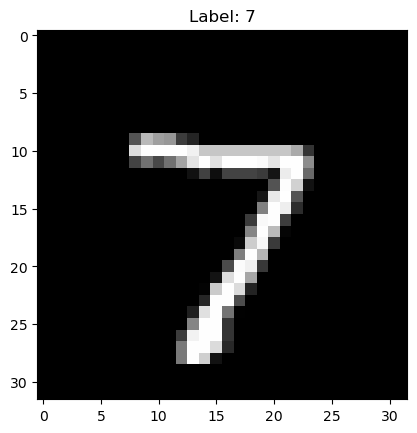

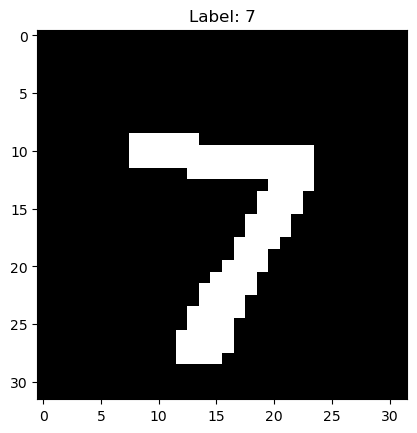

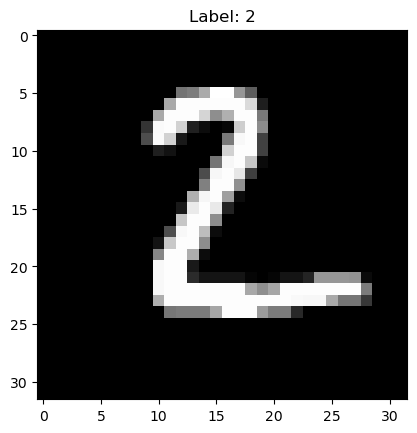

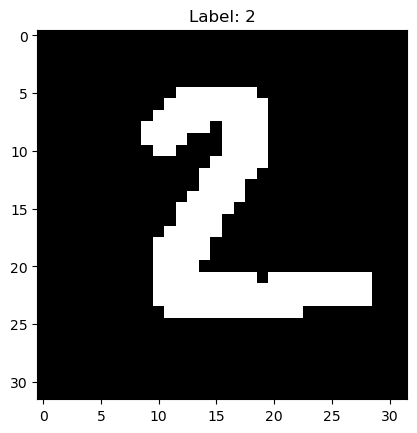

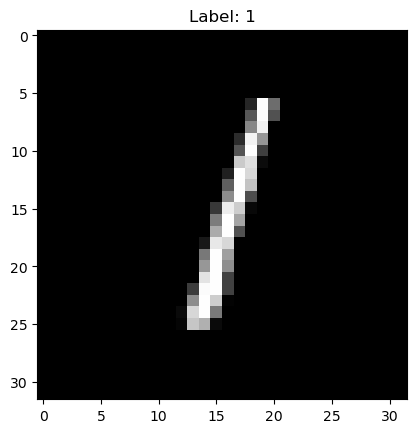

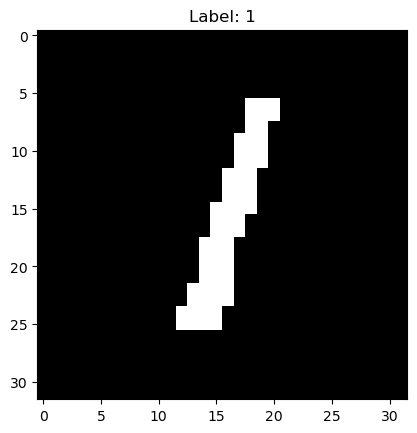

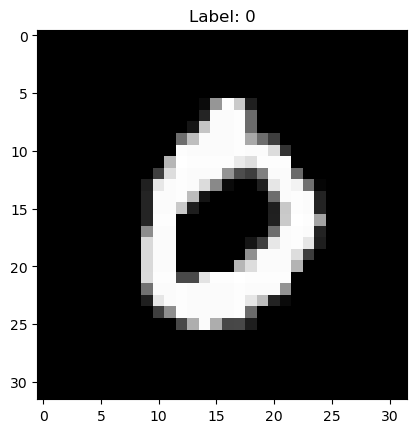

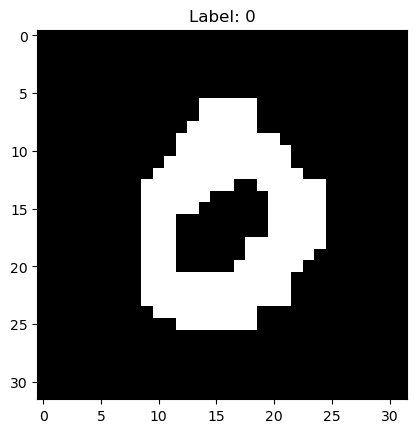

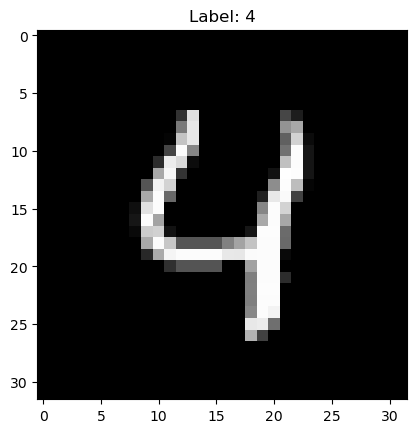

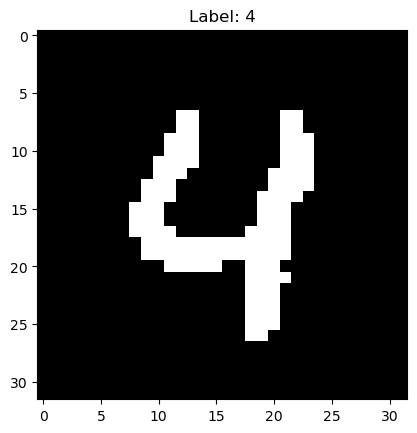

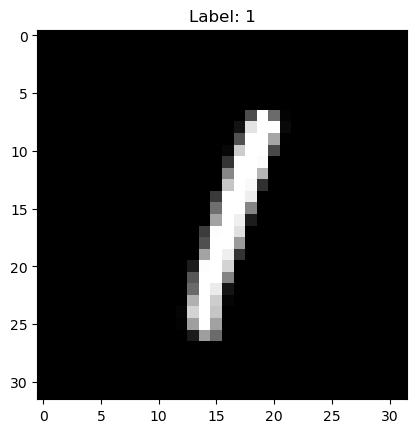

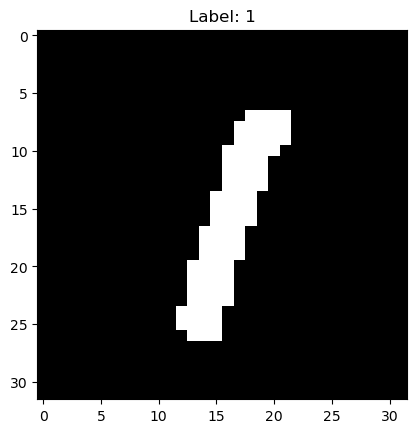

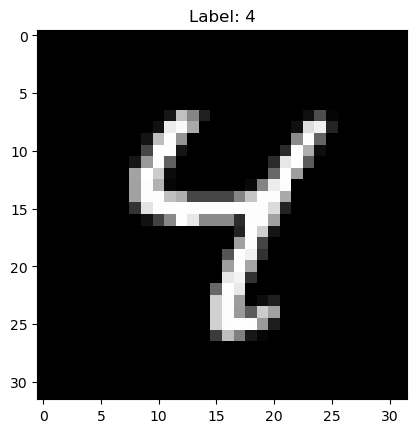

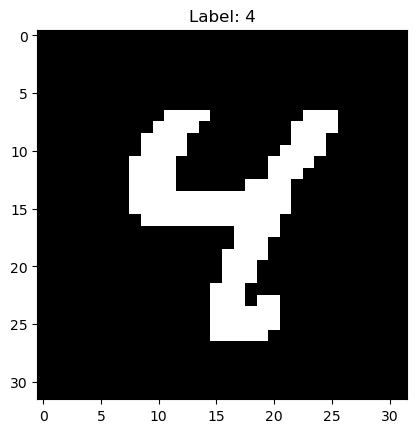

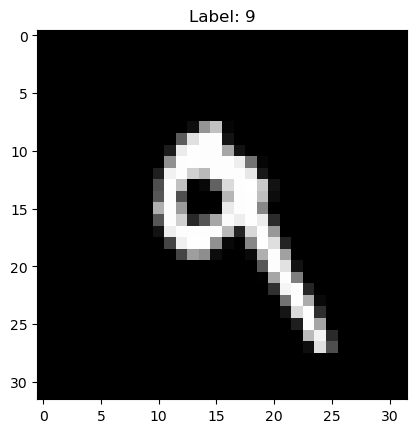

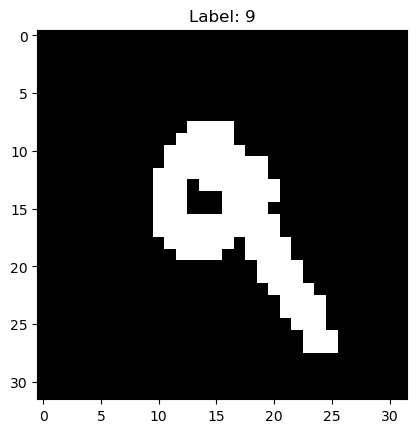

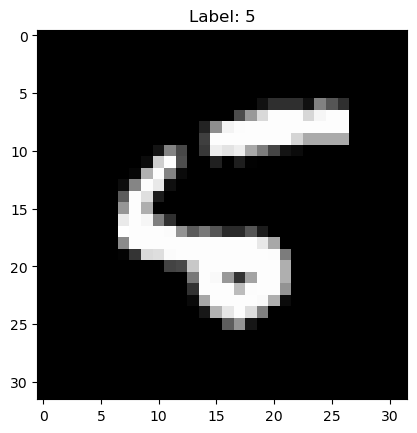

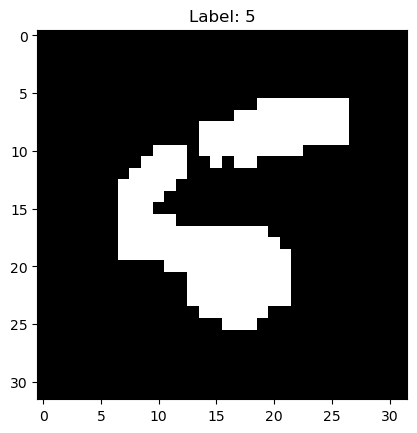

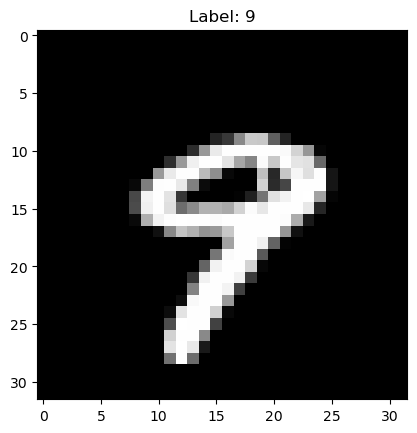

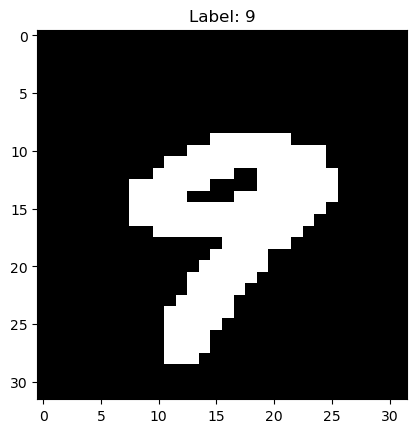

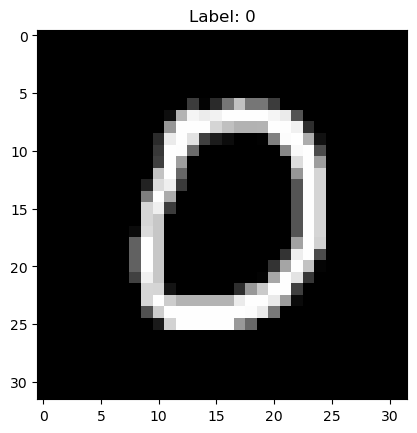

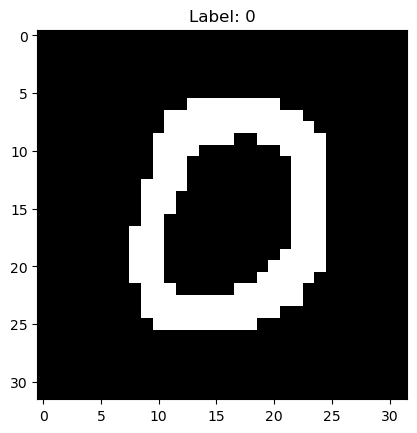

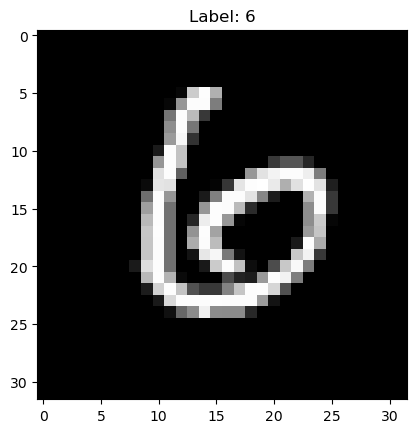

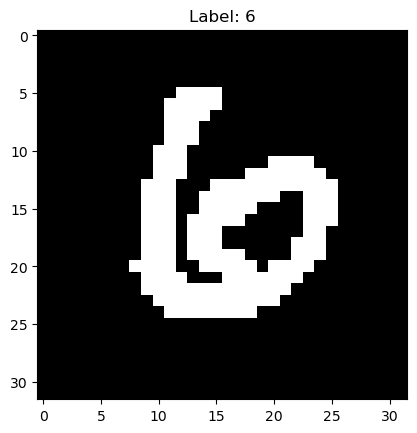

In [20]:

"""
Print the original image and the image with binarization process

"""

for index in range(12):
    data_original, target_original = test_dataset_original[index]
    data_binary, target_binary = test_dataset[index]

 
    original_matrix = data_original.squeeze().numpy()
    plt.imshow(original_matrix, cmap='gray')
    plt.title(f'Label: {target_original}')
    plt.show()

    binary_matrix = data_binary.squeeze().numpy()
    
    plt.imshow(binary_matrix, cmap='gray')
    plt.title(f'Label: {target_binary}')
    plt.show()

    # 将二进制图像矩阵写入txt
    if(index == 0):
        with open('./cnn_parameter/infmap_binary_mul.txt', 'w') as f:
            for row in binary_matrix:
                for value in row:
                    f.write(str(int(value)))
                    f.write(',\n')

    # 将原始图像矩阵写入txt
        with open('./cnn_parameter/infmap_original_mul.txt', 'w') as f:
            for row in original_matrix:
                for value in row:
                    f.write(str(float(value)))
                    f.write(',\n')
    else:
        with open('./cnn_parameter/infmap_binary_mul.txt', 'a') as f:
            for row in binary_matrix:
                for value in row:
                    f.write(str(int(value)))
                    f.write(',\n')

    # 将原始图像矩阵写入txt
        with open('./cnn_parameter/infmap_original_mul.txt', 'a') as f:
            for row in original_matrix:
                for value in row:
                    f.write(str(float(value)))
                    f.write(',\n')

In [4]:
# write the cnn parmeters into txt 
for name, param in loaded_model.named_parameters():
    with open(f'./cnn_parameter/{name}.txt', 'w') as f:
        # 将参数数据转换为字符串并写入文件，每行一个元素
        for value in param.data.view(-1):
   
            f.write(str(value.item()) +','+ '\n')

In [132]:
"""
calculate one image inference time by local CPU

"""
import time
total_time=0
count = 10000
num = 1;
num_time = 0;
for j in range (num):
    total_time=0
    for i in range (count):

        data_original, target_original = test_dataset_original[i]

        start_time = time.perf_counter_ns()
        outputs =loaded_model(data_original)
        end_time = time.perf_counter_ns()
        
        execution_time = end_time - start_time
        total_time = total_time+ execution_time
    num_time = num_time + total_time/count



print(f"One inference time：{ num_time/num} ns")


One inference time：622306.57 ns


In [3]:
"""
Function defination: load CNN parameters and INFMAP

"""

def load_weight_0(file_path, in_channels, kernel_num, kernel_dim):
    weight_matrix = np.zeros((in_channels, kernel_num, kernel_dim, kernel_dim))
    data = []
    with open(file_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            value = float(line.strip().rstrip(','))
            data.append(value)
    index = 0
    for m in range (in_channels):
        for k in range(kernel_num):
            for i in range(kernel_dim):
                for j in range(kernel_dim):
                    weight_matrix[m, k, i, j] = data[index]
                    index += 1
    return weight_matrix

def load_weight_fc_0(file_path,  kernel_num, kernel_element):
    weight_matrix = np.zeros(( kernel_num,kernel_element))
    data = []
    with open(file_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            value = float(line.strip().rstrip(','))
            data.append(value)
    index = 0
   
    for i in range(kernel_num):
        for j in range(kernel_element):
                weight_matrix[ i, j] = data[index]
                index += 1
    return weight_matrix

def load_bias_0(file_path,  kernel_num):
    bias_matrix = np.zeros(( kernel_num))
    data = []
    with open(file_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            value = float(line.strip().rstrip(','))
            data.append(value)
    index = 0
   
    for i in range(kernel_num):
            bias_matrix[ i] = data[index]
            index += 1
    return bias_matrix

def load_data_0(file_path, infmap_rows, infmap_cols):
    data_matrix = np.zeros((infmap_rows,infmap_cols))
    data = []
    index = 0
    with open(file_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            value = float (line.strip().rstrip(','))
            data.append(value)
   
    for i in range(infmap_rows):
        for j in range(infmap_cols):   
                data_matrix[ i, j] = data[index]
                index += 1
    return data_matrix

In [21]:
"""
Using Lenet model to infer one image (this can show the intermediate reults of each layer)

"""
import numpy as np
import torch
import torch.nn.functional as F

# 参数定义
INFMAP_ROWS = 32
INFMAP_COLS =32

IN_CHANNEL1 =1
KERNEL_NUM1 = 6
KERNEL_DIM1= 5


IN_CHANNEL2 =6
KERNEL_NUM2 = 16
KERNEL_DIM2= 5

IN_CHANNEL3 =16
KERNEL_NUM3 = 120
KERNEL_DIM3= 5


IN_CHANNEL4 =1
KERNEL_NUM4 = 84
KERNEL_ELEMENT4= 120


IN_CHANNEL5 =1
KERNEL_NUM5 = 10
KERNEL_ELEMENT5= 84
data_path = './cnn_parameter/infmap_original.txt'
weight_path1 = './cnn_parameter/conv1.weight.txt'
weight_path2 = './cnn_parameter/conv2.weight.txt'
weight_path3 = './cnn_parameter/conv3.weight.txt'
weight_path4 = './cnn_parameter/fc1.weight.txt'
weight_path5 = './cnn_parameter/fc2.weight.txt'

bias_path1 = './cnn_parameter/conv1.bias.txt'
bias_path2 = './cnn_parameter/conv2.bias.txt'
bias_path3 = './cnn_parameter/conv3.bias.txt'
bias_path4 = './cnn_parameter/fc1.bias.txt'
bias_path5 = './cnn_parameter/fc2.bias.txt'

data = load_data_0(data_path,INFMAP_ROWS,INFMAP_COLS)
weight1= load_weight_0(weight_path1,IN_CHANNEL1,KERNEL_NUM1,KERNEL_DIM1)
weight2= load_weight_0(weight_path2,IN_CHANNEL2,KERNEL_NUM2,KERNEL_DIM2)
weight3= load_weight_0(weight_path3,IN_CHANNEL3,KERNEL_NUM3,KERNEL_DIM3)

weight4= load_weight_fc_0(weight_path4,KERNEL_NUM4,KERNEL_ELEMENT4)
weight5=load_weight_fc_0(weight_path5,KERNEL_NUM5,KERNEL_ELEMENT5)


bias1 = load_bias_0(bias_path1,KERNEL_NUM1)
bias2 = load_bias_0(bias_path2,KERNEL_NUM2)
bias3 = load_bias_0(bias_path3,KERNEL_NUM3)
bias4 = load_bias_0(bias_path4,KERNEL_NUM4)
bias5 =load_bias_0(bias_path5,KERNEL_NUM5)

data_tensor = torch.tensor(data, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
weight1_tensor = torch.tensor(weight1, dtype=torch.float32).view(KERNEL_NUM1, IN_CHANNEL1, KERNEL_DIM1, KERNEL_DIM1)
bias1_tensor = torch.tensor(bias1, dtype=torch.float32)



weight2_tensor = torch.tensor(weight2, dtype=torch.float32).view(KERNEL_NUM2, IN_CHANNEL2, KERNEL_DIM2, KERNEL_DIM2)
bias2_tensor = torch.tensor(bias2, dtype=torch.float32)


weight3_tensor = torch.tensor(weight3, dtype=torch.float32).view(KERNEL_NUM3, IN_CHANNEL3, KERNEL_DIM3, KERNEL_DIM3)
bias3_tensor = torch.tensor(bias3, dtype=torch.float32)

weight4_tensor = torch.tensor(weight4, dtype=torch.float32)
bias4_tensor = torch.tensor(bias4, dtype=torch.float32)

weight5_tensor = torch.tensor(weight5, dtype=torch.float32)
bias5_tensor = torch.tensor(bias5, dtype=torch.float32)

torch.set_printoptions(edgeitems=32, linewidth=1000, precision=2)

np.set_printoptions(suppress=True)
# layer1
conv1 = F.conv2d(data_tensor, weight1_tensor) + bias1_tensor.view(1, KERNEL_NUM1, 1, 1)
pool1 = F.max_pool2d(conv1, kernel_size=2, stride=2)
relu1 = F.relu(pool1)


#print("layer1_conv:  \n", conv1) 
#print("layer1_pool：  \n",pool1)
#print("layer1_relu:  \n",relu1)


# layer2
conv2 = F.conv2d(relu1, weight2_tensor) + bias2_tensor.view(1, KERNEL_NUM2, 1, 1)
pool2 = F.max_pool2d(conv2, kernel_size=2, stride=2)
relu2 = F.relu(pool2)
#print("layer2_conv: \n", conv2) 
#print("layer2_pool：  \n",pool2)
#print("layer2_relu ： \n",relu2)


#layer3
conv3 = F.conv2d(relu2, weight3_tensor) + bias3_tensor.view(1, KERNEL_NUM3, 1, 1)
relu3 = F.relu(conv3)
#print("layer3_conv:   \n", conv3) 
#print("layer3_relu  \n",relu3)

#fc1
torch.set_printoptions(precision = 5) # 设置打印精度为4位小数
flatten = relu3.view(-1, 120)
fc1 = F.linear(flatten, weight4_tensor)+bias4_tensor
relu4 = F.relu(fc1)
#print("fc1_fc: \n ", fc1) 
#print("fc1_relu: \n ", relu4) 


flatten1 = relu4.view(-1, 84)
fc2 = F.linear(flatten1, weight5_tensor)+bias5_tensor

print("fc2_fc: \n ", fc2) 


#print(bias5_tensor)
with torch.no_grad():
    outputs = loaded_model(data_tensor)

print("data_tensor: \n",outputs)

fc2_fc: 
  tensor([[-2.42743, -4.29427, -1.28559, -5.65148, 14.47953, -0.63481, -1.41491, -1.81813, -2.02507,  4.39084]])
data_tensor: 
 tensor([[-2.42743, -4.29427, -1.28559, -5.65148, 14.47953, -0.63481, -1.41491, -1.81813, -2.02507,  4.39084]])


In [5]:

"""
Function defination: load CNN parameters and INFMAP with data quantization

"""
import numpy as np
def load_weight(file_path, in_channels, kernel_num, kernel_dim):
    weight_matrix = np.zeros((in_channels, kernel_num, kernel_dim, kernel_dim))
    data = []
    with open(file_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            value =int( round(float(line.strip().rstrip(','))*2**15))
            data.append(value)
    index = 0
    
    print(file_path, max(data),min(data))
    
    for m in range (in_channels):
        for k in range(kernel_num):
            for i in range(kernel_dim):
                for j in range(kernel_dim):
                    weight_matrix[m, k, i, j] = data[index]
                    index += 1
    return weight_matrix

def load_weight_fc(file_path,  kernel_num, kernel_element):
    weight_matrix = np.zeros(( kernel_num,kernel_element))
    data = []
    with open(file_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            value =int( round(float(line.strip().rstrip(','))*2**15))
            data.append(value)
    index = 0
    
    print(file_path, max(data),min(data))
    
    for i in range(kernel_num):
        for j in range(kernel_element):
                weight_matrix[ i, j] = data[index]
                index += 1
    return weight_matrix

def load_bias(file_path,  kernel_num):
    bias_matrix = np.zeros(( kernel_num))
    data = []
    with open(file_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            value = int( round(float(line.strip().rstrip(','))*2**15))
            data.append(value)
    index = 0
    
    print(file_path, max(data),min(data))
    
    for i in range(kernel_num):
            bias_matrix[ i] = data[index]
            index += 1
    return bias_matrix
                      
def load_data(file_path, infmap_rows, infmap_cols):
    data_matrix = np.zeros((infmap_rows,infmap_cols))
    data = []
    index = 0
    with open(file_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            value = int(line.strip().rstrip(','))
            data.append(value)
   
    for i in range(infmap_rows):
        for j in range(infmap_cols):   
                data_matrix[ i, j] = data[index]
                index += 1
    return data_matrix

In [6]:
"""
Using Lenet model to infer images with data quantization (this can show the intermediate reults of each layer)

"""

import numpy as np
import torch
import torch.nn.functional as F


INFMAP_ROWS = 32
INFMAP_COLS =32

IN_CHANNEL1 =1
KERNEL_NUM1 = 6
KERNEL_DIM1= 5


IN_CHANNEL2 =6
KERNEL_NUM2 = 16
KERNEL_DIM2= 5

IN_CHANNEL3 =16
KERNEL_NUM3 = 120
KERNEL_DIM3= 5


IN_CHANNEL4 =1
KERNEL_NUM4 = 84
KERNEL_ELEMENT4= 120


IN_CHANNEL5 =1
KERNEL_NUM5 = 10
KERNEL_ELEMENT5= 84
data_path = './cnn_parameter/infmap_binary.txt'
weight_path1 = './cnn_parameter/conv1.weight.txt'
weight_path2 = './cnn_parameter/conv2.weight.txt'
weight_path3 = './cnn_parameter/conv3.weight.txt'
weight_path4 = './cnn_parameter/fc1.weight.txt'
weight_path5 = './cnn_parameter/fc2.weight.txt'

bias_path1 = './cnn_parameter/conv1.bias.txt'
bias_path2 = './cnn_parameter/conv2.bias.txt'
bias_path3 = './cnn_parameter/conv3.bias.txt'
bias_path4 = './cnn_parameter/fc1.bias.txt'
bias_path5 = './cnn_parameter/fc2.bias.txt'

data = load_data(data_path,INFMAP_ROWS,INFMAP_COLS)
weight1= load_weight(weight_path1,IN_CHANNEL1,KERNEL_NUM1,KERNEL_DIM1)

weight2= load_weight(weight_path2,IN_CHANNEL2,KERNEL_NUM2,KERNEL_DIM2)
weight3= load_weight(weight_path3,IN_CHANNEL3,KERNEL_NUM3,KERNEL_DIM3)

weight4= load_weight_fc(weight_path4,KERNEL_NUM4,KERNEL_ELEMENT4)
weight5=load_weight_fc(weight_path5,KERNEL_NUM5,KERNEL_ELEMENT5)


bias1 = load_bias(bias_path1,KERNEL_NUM1)
bias2 = load_bias(bias_path2,KERNEL_NUM2)
bias3 = load_bias(bias_path3,KERNEL_NUM3)
bias4 = load_bias(bias_path4,KERNEL_NUM4)
bias5 =load_bias(bias_path5,KERNEL_NUM5)
#rint(bias5)data_tensor = torch.tensor(data, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
weight1_tensor = torch.tensor(weight1, dtype=torch.float32).view(KERNEL_NUM1, IN_CHANNEL1, KERNEL_DIM1, KERNEL_DIM1)
bias1_tensor = torch.tensor(bias1, dtype=torch.float32)



weight2_tensor = torch.tensor(weight2, dtype=torch.float32).view(KERNEL_NUM2, IN_CHANNEL2, KERNEL_DIM2, KERNEL_DIM2)
bias2_tensor = torch.tensor(bias2, dtype=torch.float32)


weight3_tensor = torch.tensor(weight3, dtype=torch.float32).view(KERNEL_NUM3, IN_CHANNEL3, KERNEL_DIM3, KERNEL_DIM3)
bias3_tensor = torch.tensor(bias3, dtype=torch.float32)

weight4_tensor = torch.tensor(weight4, dtype=torch.float32)
bias4_tensor = torch.tensor(bias4, dtype=torch.float32)

weight5_tensor = torch.tensor(weight5, dtype=torch.float32)
bias5_tensor = torch.tensor(bias5, dtype=torch.float32)



torch.set_printoptions(edgeitems=32, linewidth=1000, precision=2)
# 设置 numpy 打印选项以非科学计数法显示
np.set_printoptions(suppress=True)
total=0
correct = 0 
for i in range (10000):
    # select data in test_dataset
    #layer1
    data_binary1, target_binary1 = test_dataset[i]
    conv1 = F.conv2d(data_binary1, weight1_tensor) + bias1_tensor.view(1, KERNEL_NUM1, 1, 1)
    pool1 = F.max_pool2d(conv1, kernel_size=2, stride=2)
    o1 = torch.floor(pool1/(2**15)) # data quantization
    relu1 = F.relu(o1)
    #print("layer1_conv:  \n", conv1) 
    # print("layer1_pool：  \n",pool1)
    #print("layer1_relu:  \n",relu1)



    #layer2
    conv2 = F.conv2d(relu1, weight2_tensor) + bias2_tensor.view(1, KERNEL_NUM2, 1, 1)
    pool2 = F.max_pool2d(conv2, kernel_size=2, stride=2)
    o2 =torch.floor(pool2/(2**15))
    relu2 = F.relu(o2)
    #print("layer2_conv: \n", conv2) 
    #print("layer2_pool：  \n",pool2)
    #print("layer2_relu ： \n",relu2)

    
    #layer3
    conv3 = F.conv2d(relu2, weight3_tensor)+ bias3_tensor.view(1, KERNEL_NUM3, 1, 1)
    o3 = torch.floor(conv3/(2**15))
    relu3 = F.relu(o3)

    #print("layer3_conv:   \n", conv3) 
    #print("layer3_relu  \n",relu3)

    #fc1
    flatten = relu3.view(-1, 120)
    fc1 = F.linear(flatten, weight4_tensor)+bias4_tensor
    o4= torch.floor(fc1/(2**15))
    relu4 = F.relu(o4)
    #print("fc1_fc: \n ", fc1) 
    #print("fc1_relu: \n ", relu4) 

    #fc2
    flatten1 = relu4.view(-1, 84)
    fc2 = F.linear(flatten1, weight5_tensor)+bias5_tensor
    o5= torch.floor(fc2/(2**15))
    #print("fc2_fc: \n ", o5) 

    max_value, max_index = torch.max(o5.view(-1), 0)
   # print(f"max_index：{max_index.item()}")
    #print(target_binary1)
    total = total+1
    correct += (max_index == target_binary1).sum().item()

print(f'Accuracy on original test set: {100 * correct / total}%')        


./cnn_parameter/conv1.weight.txt 27883 -22781
./cnn_parameter/conv2.weight.txt 28409 -13450
./cnn_parameter/conv3.weight.txt 8002 -8872
./cnn_parameter/fc1.weight.txt 9069 -9351
./cnn_parameter/fc2.weight.txt 17114 -16428
./cnn_parameter/conv1.bias.txt 10587 -10342
./cnn_parameter/conv2.bias.txt 2805 -5489
./cnn_parameter/conv3.bias.txt 2412 -2011
./cnn_parameter/fc1.bias.txt 4930 -3566
./cnn_parameter/fc2.bias.txt 3198 -5556
Accuracy on original test set: 97.65%
